In [1]:
%load_ext autoreload
%autoreload 2

## Pick out the right tracks for Key test Set

In [2]:
import util as ut
import numpy as np
import os
import jams
import librosa
import matplotlib.pyplot as plt
import madmom
import mirdata

In [3]:
gskey = mirdata.initialize('giantsteps_key', data_home='/scratch/qx244/data/gskey')

In [4]:
gs_ids = gskey.track_ids
gs_data = gskey.load_tracks()

In [5]:
good_files = {}

for i in range(len(gs_ids)):
    sample_track = gs_data[gs_ids[i]]
    key_list = sample_track.key.split('|')
    tonic_list = [k.strip().split(' ')[0] for k in key_list]
#     print(i, tonic_list, key_list)
    if len(tonic_list) > 1:
        # this means modulation
#         print(i, tonic_list, key_list)
        pass
    elif tonic_list[0] == 'X' or tonic_list[0].endswith(('^', '_')):
#         print(i, tonic_list, key_list)
        pass
    else:
        keymode = key_list[0].split(' ')[:2]
        if keymode[1] == 'major' or keymode[1] == 'minor':
            good_files[gs_ids[i]] = ':'.join(keymode)
#             print(gs_ids[i], keymode)
        else:
#             print(gs_ids[i], keymode)
            pass
        
print(len(good_files))

476


In [19]:
good_files

{'1': 'C:minor',
 '2': 'F:minor',
 '3': 'D:major',
 '4': 'E:minor',
 '5': 'E:minor',
 '6': 'E:major',
 '8': 'F:minor',
 '9': 'Gb:minor',
 '10': 'G:major',
 '11': 'Ab:major',
 '13': 'G:minor',
 '14': 'A:minor',
 '15': 'A:minor',
 '16': 'F:minor',
 '18': 'Bb:minor',
 '19': 'C:minor',
 '20': 'G:minor',
 '21': 'Gb:minor',
 '22': 'C:major',
 '23': 'G:minor',
 '24': 'C:major',
 '25': 'G:minor',
 '27': 'D:minor',
 '28': 'D:minor',
 '29': 'E:minor',
 '30': 'Bb:major',
 '31': 'G:major',
 '32': 'G:minor',
 '33': 'G:minor',
 '34': 'F:minor',
 '35': 'Bb:major',
 '38': 'Bb:major',
 '39': 'B:minor',
 '41': 'F:minor',
 '42': 'F:minor',
 '43': 'D:minor',
 '44': 'Eb:minor',
 '45': 'F:major',
 '46': 'C:minor',
 '47': 'B:minor',
 '48': 'C:minor',
 '49': 'E:major',
 '50': 'B:minor',
 '51': 'Ab:major',
 '52': 'A:minor',
 '53': 'Eb:minor',
 '54': 'Db:minor',
 '55': 'F:major',
 '56': 'G:minor',
 '57': 'A:minor',
 '58': 'Ab:minor',
 '59': 'Gb:minor',
 '60': 'C:minor',
 '62': 'Ab:major',
 '64': 'E:major',
 '65

## Pack the pred_all and label_all matrix

In [23]:
gs_data['1']

Track(
  audio_path="/scratch/qx244/data/gskey/audio/1004923 Kaiserdisco - Carachillo (Original Mix).mp3",
  keys_path="/scratch/qx244/data/gskey/keys_gs+/1004923 Kaiserdisco - Carachillo (Original Mix).txt",
  metadata_path="/scratch/qx244/data/gskey/meta/1004923 Kaiserdisco - Carachillo (Original Mix).json",
  title="1004923 Kaiserdisco - Carachillo (Original Mix)",
  track_id="1",
  artists: ,
  audio: The track's audio

        Returns,
  genres: ,
  key: ,
  tempo: ,
)

In [6]:
p = '/scratch/qx244/data/gskey/augmentation/'
id_label = {}

for i in good_files.keys():
    id_label[gs_data[i].title.split(' ')[0]] = good_files[i]
    
print(len(id_label))

476


In [41]:
id_label

{'1004923': 'C:minor',
 '1007941': 'F:minor',
 '10089': 'D:major',
 '1009960': 'E:minor',
 '101069': 'E:minor',
 '1017921': 'E:major',
 '1033148': 'F:minor',
 '1034795': 'Gb:minor',
 '1037507': 'G:major',
 '1041574': 'Ab:major',
 '1052744': 'G:minor',
 '1056896': 'A:minor',
 '1074548': 'A:minor',
 '1075123': 'F:minor',
 '1103512': 'Bb:minor',
 '1105632': 'C:minor',
 '1140027': 'G:minor',
 '1149778': 'Gb:minor',
 '1161234': 'C:major',
 '1161249': 'G:minor',
 '1164898': 'C:major',
 '1178656': 'G:minor',
 '1194720': 'D:minor',
 '1198688': 'D:minor',
 '1206025': 'E:minor',
 '1209745': 'Bb:major',
 '1224698': 'G:major',
 '1234668': 'G:minor',
 '1234669': 'G:minor',
 '1234670': 'F:minor',
 '1234748': 'Bb:major',
 '1234751': 'Bb:major',
 '1234752': 'B:minor',
 '1298595': 'F:minor',
 '1316308': 'F:minor',
 '1353830': 'D:minor',
 '1356281': 'Eb:minor',
 '1389887': 'F:major',
 '140603': 'C:minor',
 '1406309': 'B:minor',
 '1415239': 'C:minor',
 '1442809': 'E:major',
 '1468437': 'B:minor',
 '14741

In [7]:
def to_madmom_label(keymode, trans):
    tonic, mode = keymode.split(':')
    madmom_out = (librosa.note_to_midi(tonic) + 3 + int(trans) - 5) % 12 # +3 so that A is bin 0, -5 so that 00 is -5
    if mode == 'minor':
        madmom_out += 12
    return madmom_out

In [61]:
pred_list = []
label_list = []

p = '/scratch/qx244/data/gskey/augmentation/'
for k in id_label.keys():
    keymode = id_label[k]
    song_preds_paths = ut.glob(p + k + '*.05.npy')
    for f in song_preds_paths:
        trans = f.split('/')[-1].split('.')[-2]
        pred_list.append(np.load(f))
#         print(f, trans)
        label_list.append(to_madmom_label(keymode, trans))
        
#         print(keymode, trans)
#         print(to_madmom_label(keymode, trans))
#         jams_path = f.rsplit('.', 1)[0] + '.jams'
#         jam = jams.load(jams_path)
#         print(jam.search(namespace='key_mode')[0].to_dataframe().value[0])

pred_all = np.concatenate(pred_list, axis=0)
label_all = np.array(label_list) # So that bin 0 is A to match with madmom

In [62]:
label_all.shape

(476,)

In [63]:
from scipy.optimize import minimize_scalar

In [64]:
res = minimize_scalar(ut.better_track_nll,
                      args=(label_all, pred_all),
                      bounds=(0, 2),
                      method='bounded')

In [65]:
res

     fun: 0.6220509293529419
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 1.1559358678320732

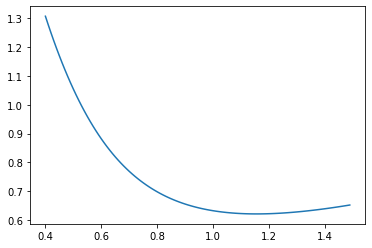

In [66]:
plt.plot(np.arange(0.4, 1.5, 0.01),
         [ut.better_track_nll(b, label_all, pred_all) 
          for b in np.arange(0.4, 1.5, 0.01)])

In [67]:
q_all = ut.better_calibrate(res.x, pred_all)
p_bench = ut.CalibrationBenchmark(pred_all, label_all)
q_bench = ut.CalibrationBenchmark(q_all, label_all)

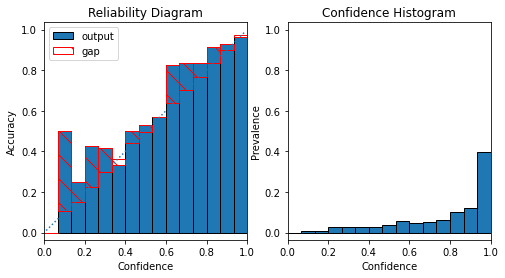

0.053042333737786065


In [68]:
p_bench.plot_rd()
print(p_bench.ece())

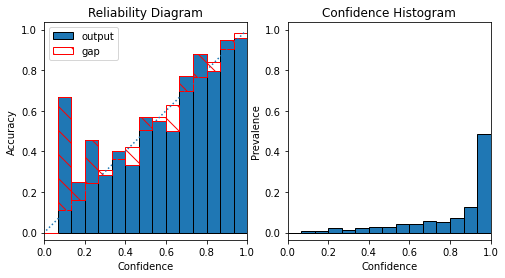

0.051818901520767874


In [69]:
q_bench.plot_rd()
print(q_bench.ece())

## Now Rock Corpus

In [21]:
import librosa.display
from scipy.stats import entropy

def track_kl(label_mat, pred_mat):
    frames = min(len(label_mat), len(pred_mat))
    return entropy(label_mat[:frames], pred_mat[:frames], axis=1)

In [17]:
rc = ut.RockCorpus()

In [32]:
idx = 49
data = rc.track_data(idx)
ann_relroot = rc.ann_data(idx)['root']

model_relroot = ut.relative_root(data['calib_key'], data['calib_root'])
model_relroot_raw = ut.relative_root(data['raw_key'], data['raw_root'])
model_relroot_new = ut.relative_root(data['calib_key_new'], data['calib_root'])

In [70]:
ann_key = rc.ann_data(idx)['key']

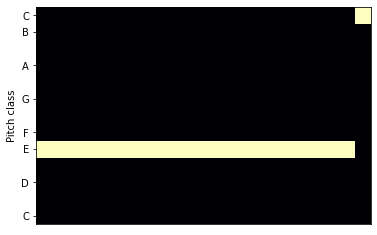

In [76]:
librosa.display.specshow(ann_key.T, y_axis='chroma')

In [75]:
rc.track_data(idx)['hard_key']

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
rc.track_data(idx)['key']

In [74]:
np.argmax(rc.ann_data(idx)['key'][100])

4

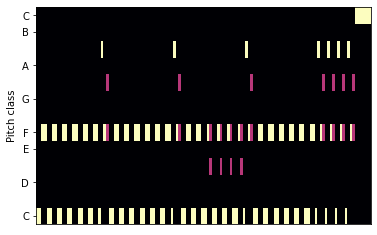

In [33]:
librosa.display.specshow(ann_relroot.T, y_axis='chroma')

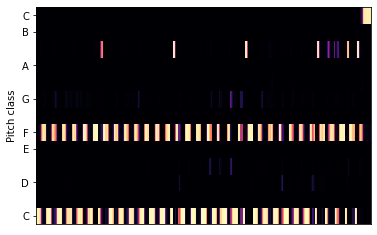

In [34]:
librosa.display.specshow(model_relroot_raw.T, y_axis='chroma')

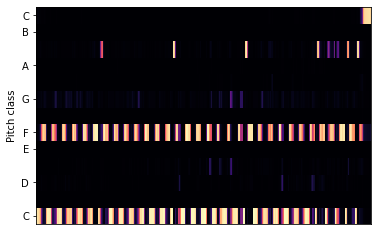

In [35]:
librosa.display.specshow(model_relroot_new.T, y_axis='chroma')

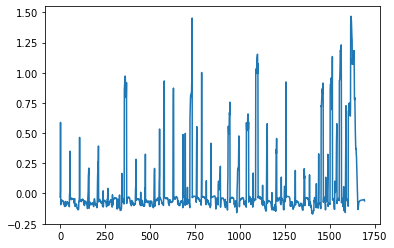

In [37]:
plt.plot(track_kl(ann_relroot, model_relroot_raw) - track_kl(ann_relroot, model_relroot_new))
plt.show()

In [40]:
np.mean(track_kl(ann_relroot, model_relroot_raw))

0.5897545690774653

In [41]:
np.mean(track_kl(ann_relroot, model_relroot))

0.548739304339213

In [42]:
np.mean(track_kl(ann_relroot, model_relroot_new))

0.553051862846095

## Now over the whole corpus

In [43]:
kl_list = []
for i in range(len(rc)):
    data = rc.track_data(i)
    ann_relroot = rc.ann_data(i)['root']
    model_relroot = ut.relative_root(data['calib_key'], data['calib_root'])
    kl_list.append(track_kl(ann_relroot, model_relroot))
    
kl_means = [np.mean(arr) for arr in kl_list]

raw_kl_list = []
for i in range(len(rc)):
    data = rc.track_data(i)
    ann_relroot = rc.ann_data(i)['root']
    model_relroot = ut.relative_root(data['raw_key'], data['raw_root'])
    raw_kl_list.append(track_kl(ann_relroot, model_relroot))
    
raw_kl_means = [np.mean(arr) for arr in raw_kl_list]

new_kl_list = []
for i in range(len(rc)):
    data = rc.track_data(i)
    ann_relroot = rc.ann_data(i)['root']
    model_relroot = ut.relative_root(data['calib_key_new'], data['calib_root'])
    new_kl_list.append(track_kl(ann_relroot, model_relroot))
    
new_kl_means = [np.mean(arr) for arr in new_kl_list]

In [53]:
def plot_track_kl(kl_raw, kl_calib):
    above_raw = []
    above_cal = []
    below_raw = []
    below_cal = []

    for pair in zip(kl_raw, kl_calib):
        if pair[1] >= pair[0]:
            above_raw.append(pair[0])
            above_cal.append(pair[1])
        else:
            below_raw.append(pair[0])
            below_cal.append(pair[1])

    plt.figure(figsize=(10,10))
    plt.scatter(above_raw, above_cal)
    plt.scatter(below_raw, below_cal)
    plt.ylabel('calibrated KL')
    plt.xlabel('uncalibrated KL')
    plt.plot([0,2,3.5], [0,2,3.5], ':')
    plt.show()

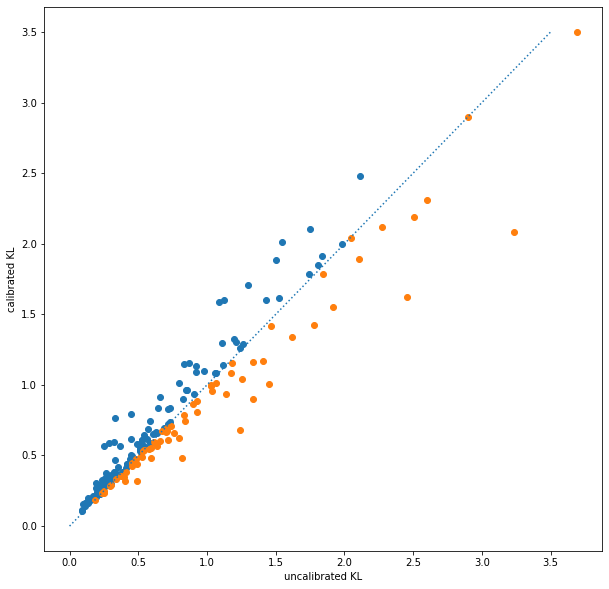

In [54]:
plot_track_kl(raw_kl_means, new_kl_means)

In [59]:
np.mean(np.array(raw_kl_means) - np.array(new_kl_means))

-0.015997864356506485

In [60]:
np.mean(np.array(raw_kl_means) - np.array(kl_means))

-0.009599504205007919

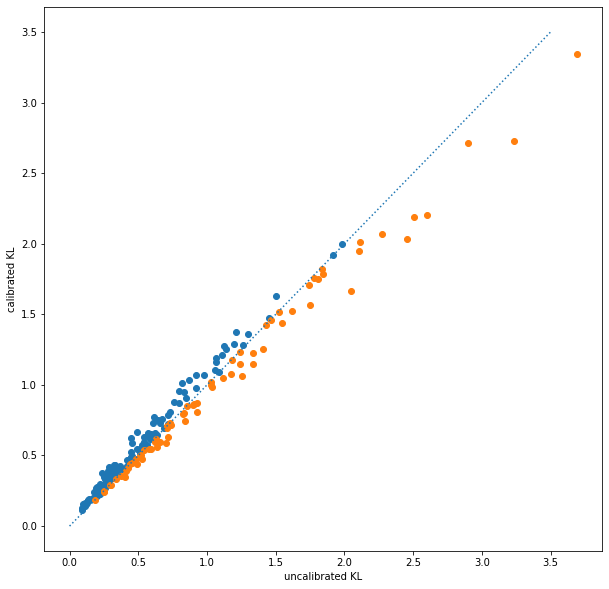

In [55]:
plot_track_kl(raw_kl_means, kl_means)

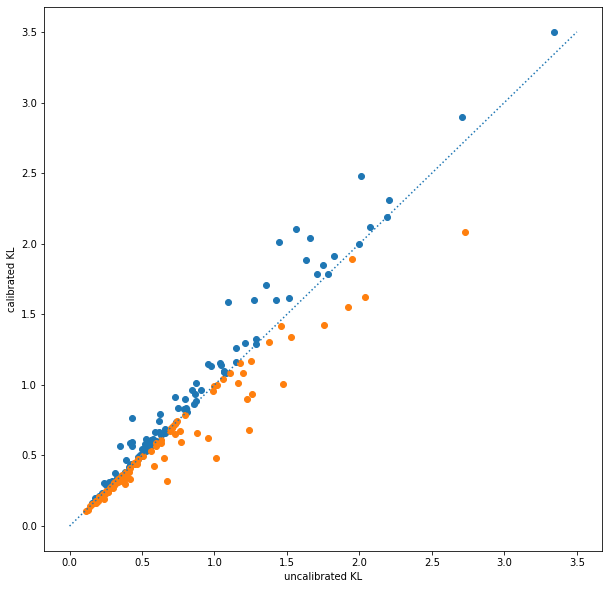

In [56]:
plot_track_kl(kl_means, new_kl_means)

In [58]:
np.mean(np.array(kl_means) - np.array(new_kl_means))

-0.006398360151498566